In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [16]:
def read_cost_data(dir_list, scenario_name_dict):
    
    costs_df = pd.DataFrame(columns=["scenario_name", "total_cost", "Power", "H2", "CO2", "SynFuels"])
    detailed_costs_df = pd.DataFrame(columns=["scenario_name", "Elec_Fixed", "Elec_Var", "Elec_Startup", "Elec_Network",
                        "H2_Gen_Fixed","H2_G2P_Fixed","H2_Storage_Fixed","H2_Var",
                        #"H2_Gen_Fixed", "H2_Liquid_Fixed","H2_G2P_Fixed","H2_Storage_Fixed","H2_Var", "H2_G2P_Var", "H2_Network","H2_Truck_Fixed", "H2_Truck_OPEX", 
                        "H2_VarElec"])
    
    for dir_name in dir_list:
        total_cost = pd.read_csv(dir_name + "/Results/status.csv").iloc[0]["Objval"]
        power_cost = pd.read_csv(dir_name + "/Results/costs.csv").iloc[0]["Total"] * 1e-9
        power_detail = pd.read_csv(dir_name + "/Results/costs.csv").loc[[1,2,4,6], ["Costs","Total"]]
        
        h2_cost = 0
        h2_elec_cost = [0]
        h2_detail = pd.DataFrame(columns=["Total"], data=np.zeros(9))
        if os.path.exists(dir_name + "/Results/Results_HSC/"):
            h2_cost = pd.read_csv(dir_name + "/Results/Results_HSC/HSC_costs.csv").iloc[0]["Total"] * 1e-9
            h2_detail = pd.read_csv(dir_name + "/Results/Results_HSC/HSC_costs.csv").loc[[1,2,3,5], ["Costs","Total"]]
            # FIX THE COST FACTOR AFTER CODE IS FIXED
            h2_elec_cost = pd.read_csv(dir_name + "/Results/Results_HSC/HSC_elec_costs.csv").sum(axis=1).tolist()

        #dac_cost= pd.read_csv("./" + dir_name + "/Results/Results_CSC/CSC_DAC_total_costs.csv").iloc[0]["Total"]
        #co2_comp_cost = pd.read_csv("./" + dir_name + "/Results/Results_CSC/CSC_co2_capture_compression_total_cost.csv").iloc[0]["Total"]
        #co2_stor_cost = pd.read_csv("./" + dir_name + "/Results/Results_CSC/CSC_co2_storage_injection_total_cost.csv").iloc[0]["Total"]
        #co2_pipe_cost = sum(pd.read_csv("./" + dir_name + "/Results/Results_CSC/CSC_co2_pipeline_expansion.csv")["Fixed_Cost_Pipes"])
        
        #csc_cost = (dac_cost+ co2_comp_cost + co2_stor_cost + co2_pipe_cost) * 1e-9
        
        synfuel_cost = 0
        csc_cost = 0
        
        if os.path.exists(dir_name + "/Results/Results_SynFuels/"):
        
            synfuel_cost = pd.read_csv(dir_name + "/Results/Results_SynFuels/SynFuel_costs.csv").iloc[0]["Total"] * 1e-9
        
        
        curr_costs_df = pd.DataFrame(index = [scenario_name_dict[dir_name]], columns=["scenario_name", "total_cost", "Power", "H2", "CO2", "SynFuels"], data=[[scenario_name_dict[dir_name],total_cost, power_cost, h2_cost, csc_cost, synfuel_cost]])
        #print(curr_costs_df)
        costs_df = pd.concat([costs_df, curr_costs_df])
        
        data=[scenario_name_dict[dir_name]]
        data.extend((power_detail['Total']*1e-9).tolist())
        data.extend((h2_detail['Total']*1e-9).tolist())
        data.extend([h2_elec_cost[0]*1e-6])  
        
        curr_detail_df = pd.DataFrame(index = [scenario_name_dict[dir_name]], columns=["scenario_name", 
            "Elec_Fixed", "Elec_Var", "Elec_Startup", "Elec_Network",
            "H2_Gen_Fixed","H2_G2P_Fixed","H2_Storage_Fixed","H2_Var",
            "H2_VarElec"], 
                data=[data])
        detailed_costs_df = pd.concat([detailed_costs_df, curr_detail_df])
    return costs_df, detailed_costs_df

KeyError: 'design_case'

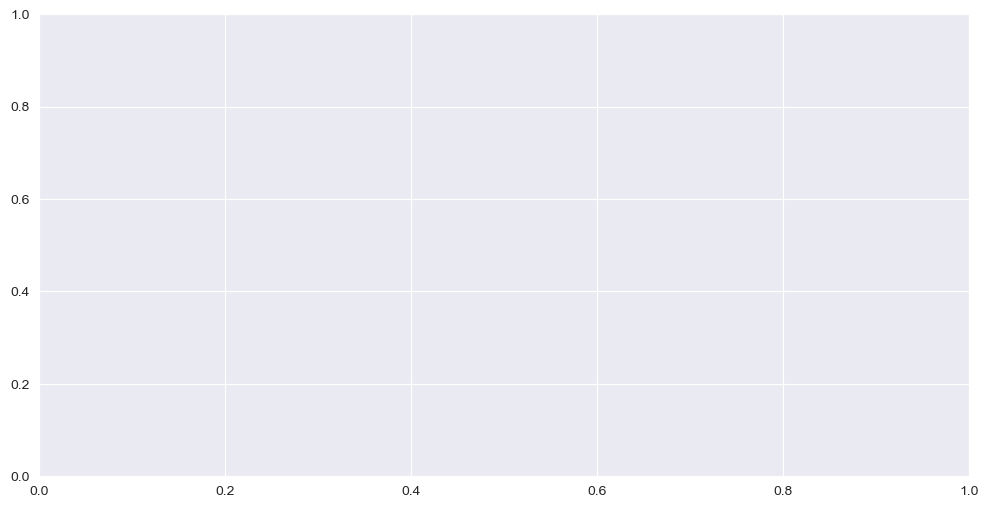

In [17]:
def fig_h2_lcoh(data, title_str):
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot design cases
    ax.scatter(range(len(data)), data['design_case'], marker='X', s=100, color='black', label='Design case')

    # Plot out-of-sample cases
    for i, row in data.iterrows():
        y_positions = np.linspace(row['min_lcoh'], row['max_lcoh'], num=len(row['out_of_sample']))
        ax.hlines(y_positions, i-0.2, i+0.2, color='gray', linewidth=2)

    ax.set_ylim(0, 5)
    ax.set_ylabel('LCOH without PTC ($/kgH2)')
    ax.set_title('Levelized cost of H2 (LCOH)')
    ax.set_xticks([])  # Remove x-axis ticks
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Add legend
    ax.legend(loc='lower left')

    # Add 'A' label in the bottom right corner
    ax.text(0.98, 0.02, 'A', transform=ax.transAxes, fontsize=12, fontweight='bold', ha='right', va='bottom')

    plt.tight_layout()
    plt.savefig('H2_LCOH_plot.png', dpi=300, bbox_inches='tight')
    plt.show()

# Example usage:
data = pd.DataFrame({
    'min_lcoh': [4.1, 3.9, 4.3, 0.7, 2.4, 2.4, 2.7, 1.7, 3.8, 4.1],
    'max_lcoh': [4.2, 4.1, 4.5, 3.4, 3.6, 3.6, 3.8, 3.4, 4.2, 4.4],
    'out_of_sample': [[4.1, 4.2], [3.9, 4.0, 4.1], [4.3, 4.4, 4.5], 
                      [0.7, 1.3, 1.8, 2.1, 2.4, 2.8, 3.1, 3.4], 
                      [2.4, 2.7, 3.0, 3.3, 3.6], [2.4, 2.7, 3.0, 3.3, 3.6],
                      [2.7, 3.1, 3.4, 3.8], [1.7, 2.3, 2.7, 3.2, 3.4], 
                      [3.8, 4.0, 4.2], [4.1, 4.2, 4.3, 4.4]]
})

fig_h2_lcoh(data, "Levelized cost of H2 (LCOH)")

In [ ]:
def design_vs_out_of_sample(data, out_of_sample, y_axis_title, title_str):
    '''
    Design vs out of sample
    :param data: Design cases
    :param out_of_sample: 
    :param title_str: 
    :return: 
    ''' 
    
    



In [ ]:

def fig_h2_lcoh(costs, costs_detail, h2_data, power_data, battery_data, elec_sales, emissions_data, title_str, xmin, xmax):
    lcoh_df = costs.merge(costs_detail, on='scenario_name')
    lcoh_df = lcoh_df.merge(pd.concat(elec_sales), left_on='scenario_name', right_on='scenario')
    
    power_data = pd.concat(power_data)
    battery_data = pd.concat(battery_data)
    PPA = ['Solar_PPA', 'Wind_PPA', 'Battery_PPA']
    battery_data = battery_data.query('resource_type in @PPA')
    power_data = power_data.query('resource_type in @PPA')
    power_data = power_data.merge(battery_data, on=['scenario', 'resource_type'])
    power_data['fixed_cost_PPA']=0

    power_data.loc[power_data['resource_type']=='Solar_PPA', 'fixed_cost_PPA']=power_data.loc[power_data['resource_type']=='Solar_PPA', 'EndCap'] * (47606+21000)
    power_data.loc[power_data['resource_type']=='Wind_PPA', 'fixed_cost_PPA']=power_data.loc[power_data['resource_type']=='Wind_PPA', 'EndCap'] * (57807+44100)
    power_data.loc[power_data['resource_type']=='Battery_PPA', 'fixed_cost_PPA']=power_data.loc[power_data['resource_type']=='Battery_PPA', 'EndCap'] * (16064+6379) + power_data.loc[power_data['resource_type']=='Battery_PPA', 'EndEnergyCap'] * (18642 +7403)

    power_data = power_data.groupby('scenario', as_index=False).sum()
    lcoh_df = lcoh_df.merge(power_data, left_on='scenario_name', right_on='scenario')
    df=lcoh_df
    df = df.merge(emissions_data, on='scenario_name')
    df['elec_fixed_cost']=df['fixed_cost_PPA']/(df['h2_prod']*1000000)
    df['elec_sales']=-df['elec_sales']/(df['h2_prod']*1000000)
    df['elec_purchases']=df['H2_VarElec']/df['h2_prod']
    df['electrolyzer_fixed_cost']=(df['H2_Gen_Fixed'])/df['h2_prod']*1000
    df['h2_storage']=df['H2_Storage_Fixed']/df['h2_prod']*1000
    df['PTC'] = 0 #initialize the column
    df.loc[df['h2_emissions_intensity']<4, 'PTC']=-0.6
    df.loc[df['h2_emissions_intensity']<2.5, 'PTC']=-0.75
    df.loc[df['h2_emissions_intensity']<1.5, 'PTC']=-1
    df.loc[df['h2_emissions_intensity']<0.456, 'PTC']=-3
    df['total_w_PTC']=df['elec_fixed_cost']+df['elec_purchases']+df['elec_sales']+df['electrolyzer_fixed_cost']+df['h2_storage']+df['PTC']
    df['total_wo_PTC']=df['elec_fixed_cost']+df['elec_purchases']+df['elec_sales']+df['electrolyzer_fixed_cost']+df['h2_storage']
    df.set_index('scenario_name',inplace=True)
    df=df.sort_index()
    print(df['total_w_PTC'])

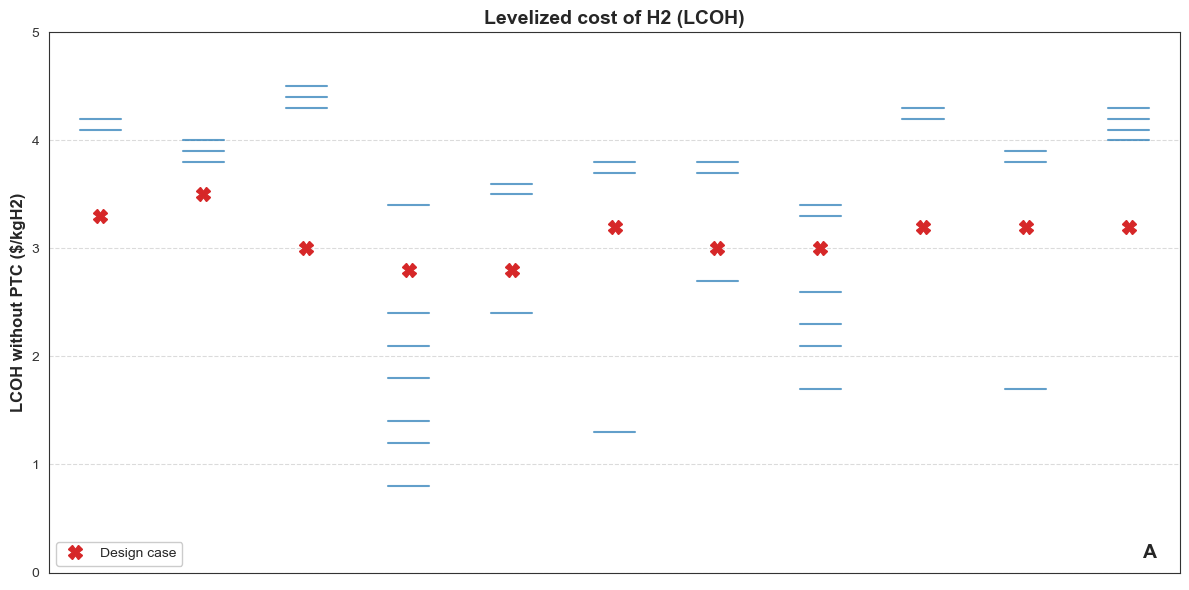

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def design_vs_out_of_sample_plot(design_case, out_of_sample_case, y_title, chart_title):
    
    
    num_points = len(design_case)
    
    
    fig, ax = plt.subplots(figsize=(12, 6))
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')
    
    for i, sample in enumerate(out_of_sample_case):
        for value in sample:
            ax.plot([i - 0.2, i + 0.2], [value, value], '-', color='#1f77b4', linewidth=1.5, alpha=0.7)
    
    ax.plot(range(num_points), design_case, 'X', color='#d62728', markersize=10, label='Design case')
    
    ax.set_ylabel(f'{y_title}', fontsize=12, fontweight='bold')
    ax.set_title(f'{chart_title}', fontsize=14, fontweight='bold')
    ax.set_ylim(0, 5)
    ax.set_xlim(-0.5, num_points-0.5)
    ax.set_xticks([])
    
    ax.grid(True, linestyle='--', alpha=0.7, color='#cccccc')
    ax.set_axisbelow(True)
    
    ax.legend(loc='lower left', frameon=True, framealpha=1, facecolor='white')
    
    ax.text(0.98, 0.02, 'A', transform=ax.transAxes, fontsize=14, fontweight='bold', 
            va='bottom', ha='right')
    
    for spine in ax.spines.values():
        spine.set_edgecolor('#333333')
    
    ax.tick_params(axis='y', colors='#333333')
    
    plt.tight_layout()
    plt.show()